<a href="https://colab.research.google.com/github/Doc889/calories_prediction/blob/main/predict_calories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Инициализация датафрейма

In [2]:
df = pd.read_csv('train (1).csv', index_col='id')
df

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
id                                                                            
0         male   36   189.0    82.0      26.0       101.0       41.0     150.0
1       female   64   163.0    60.0       8.0        85.0       39.7      34.0
2       female   51   161.0    64.0       7.0        84.0       39.8      29.0
3         male   20   192.0    90.0      25.0       105.0       40.7     140.0
4       female   38   166.0    61.0      25.0       102.0       40.6     146.0
...        ...  ...     ...     ...       ...         ...        ...       ...
749995    male   28   193.0    97.0      30.0       114.0       40.9     230.0
749996  female   64   165.0    63.0      18.0        92.0       40.5      96.0
749997    male   60   162.0    67.0      29.0       113.0       40.9     221.0
749998    male   45   182.0    91.0      17.0       102.0       40.3     109.0
749999  female   39   171.0    65.0      19.0        97.0       40.6     103.0

[750000 rows x 8 columns]

## Проверка данных на нулевые значения

In [3]:
df.isnull().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## Feature Engineering

In [7]:
df['Duration_Heart'] = df['Duration'] * df['Heart_Rate']
df['Age_Temp'] = df['Age'] * df['Body_Temp']
df['Temp_Sq'] = df['Body_Temp'] ** 2
df['Log_Duration'] = np.log1p(df['Duration'])
df['Log_Heart'] = np.log1p(df['Heart_Rate'])

In [8]:
df['Calories'] = df.pop('Calories')

In [9]:
df

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
id                                                                     
0         male   36   189.0    82.0      26.0       101.0       41.0   
1       female   64   163.0    60.0       8.0        85.0       39.7   
2       female   51   161.0    64.0       7.0        84.0       39.8   
3         male   20   192.0    90.0      25.0       105.0       40.7   
4       female   38   166.0    61.0      25.0       102.0       40.6   
...        ...  ...     ...     ...       ...         ...        ...   
749995    male   28   193.0    97.0      30.0       114.0       40.9   
749996  female   64   165.0    63.0      18.0        92.0       40.5   
749997    male   60   162.0    67.0      29.0       113.0       40.9   
749998    male   45   182.0    91.0      17.0       102.0       40.3   
749999  female   39   171.0    65.0      19.0        97.0       40.6   

        Duration_Heart  Age_Temp  Temp_Sq  Log_Duration  Log_Heart  Calories  
id                                                                            
0               2626.0    1476.0  1681.00      3.295837   4.624973     150.0  
1                680.0    2540.8  1576.09      2.197225   4.454347      34.0  
2                588.0    2029.8  1584.04      2.079442   4.442651      29.0  
3               2625.0     814.0  1656.49      3.258097   4.663439     140.0  
4               2550.0    1542.8  1648.36      3.258097   4.634729     146.0  
...                ...       ...      ...           ...        ...       ...  
749995          3420.0    1145.2  1672.81      3.433987   4.744932     230.0  
749996          1656.0    2592.0  1640.25      2.944439   4.532599      96.0  
749997          3277.0    2454.0  1672.81      3.401197   4.736198     221.0  
749998          1734.0    1813.5  1624.09      2.890372   4.634729     109.0  
749999          1843.0    1583.4  1648.36      2.995732   4.584967     103.0  

[750000 rows x 13 columns]

## Построение графика pairplot

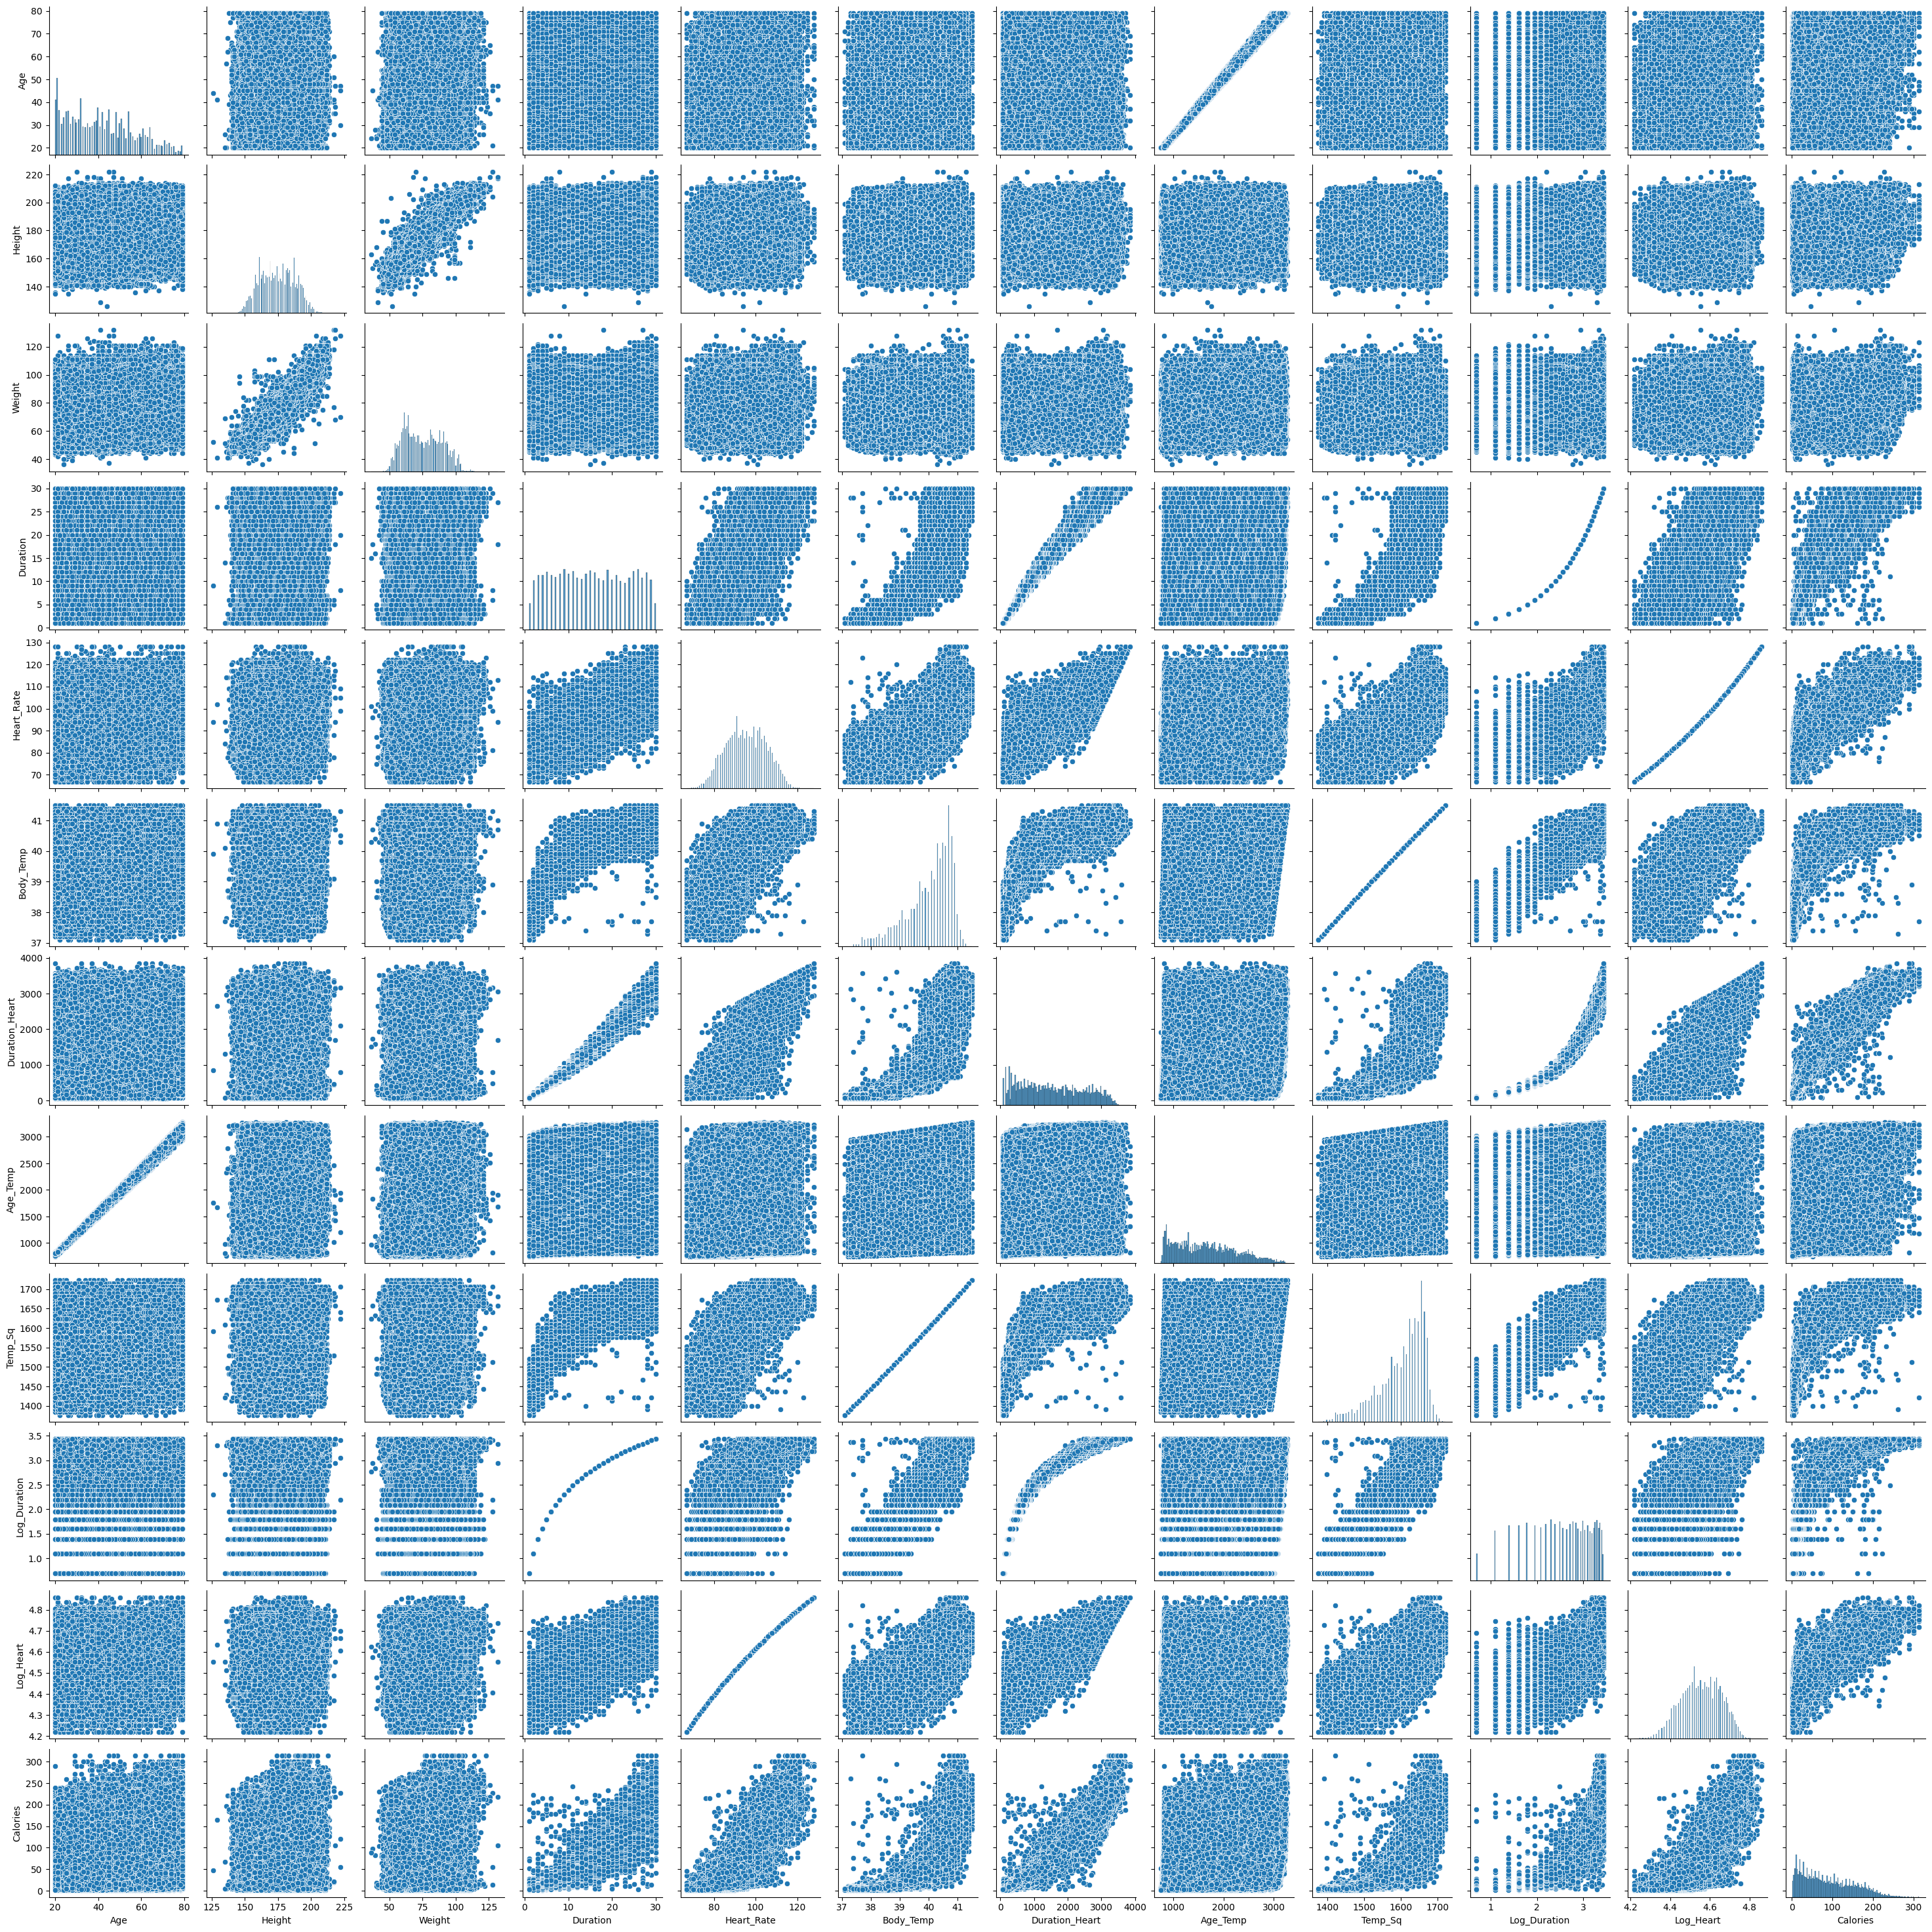

In [10]:
sns.pairplot(df)

## Построение графиков scatterplot (Базовые признаки): Duration, Heart_Rate, Body_Temp

In [11]:
sns.set_style('darkgrid')
sns.set_palette('pastel')

<Axes: xlabel='Duration', ylabel='Calories'>

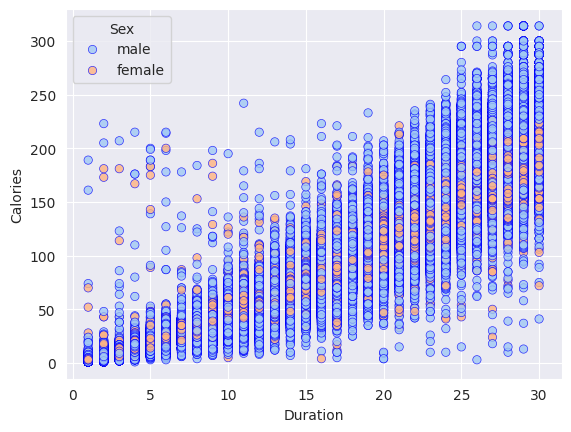

In [12]:
sns.scatterplot(df, x='Duration', y='Calories', hue='Sex', alpha=0.8, edgecolor="blue")

<Axes: xlabel='Heart_Rate', ylabel='Calories'>

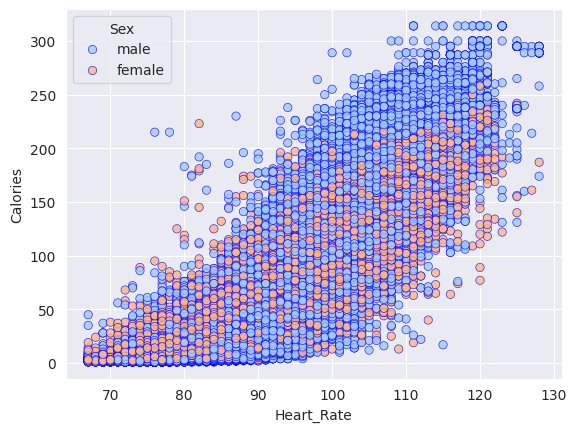

In [13]:
sns.scatterplot(df, x='Heart_Rate', y='Calories', hue='Sex', alpha=0.8, edgecolor="blue")

<Axes: xlabel='Body_Temp', ylabel='Calories'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


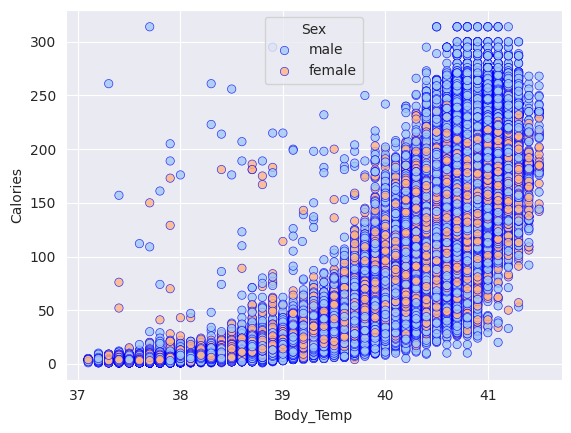

In [14]:
sns.scatterplot(df, x='Body_Temp', y='Calories', hue='Sex', alpha=0.8, edgecolor='blue')

## Инициализация переменной с количественной переменной

In [15]:
numeric_columns = df.drop(columns=['Sex']).columns
numeric_columns

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Duration_Heart', 'Age_Temp', 'Temp_Sq', 'Log_Duration', 'Log_Heart',
       'Calories'],
      dtype='object')

## Вывод графиков boxplot

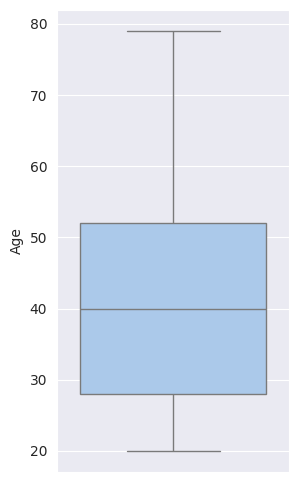

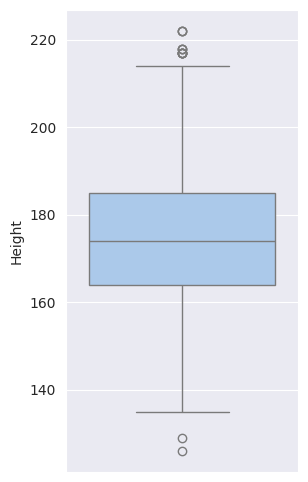

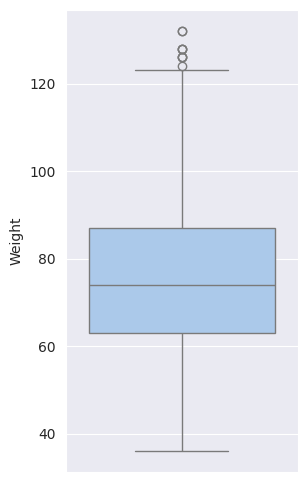

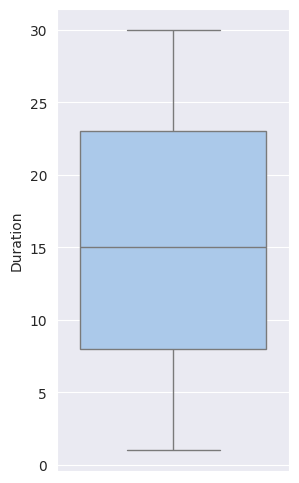

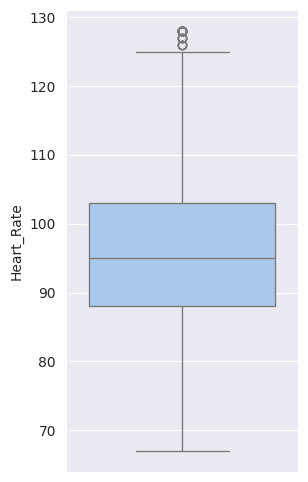

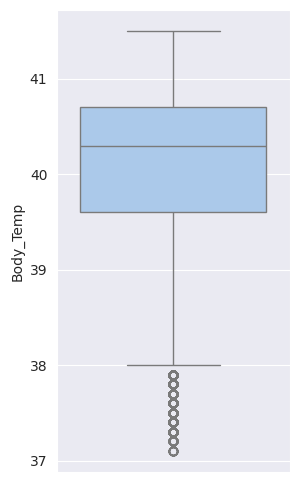

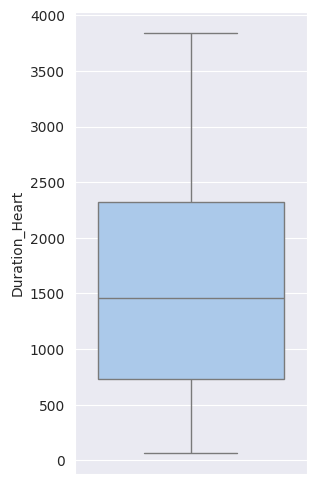

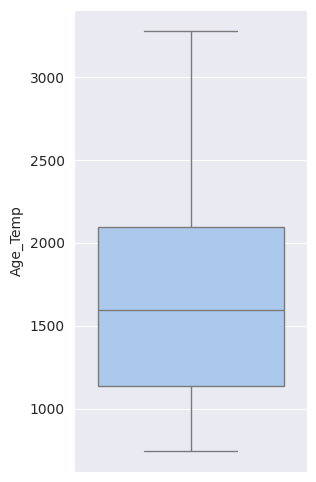

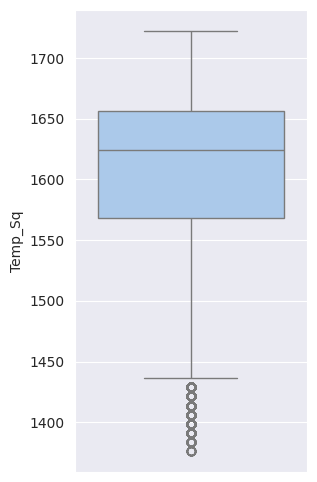

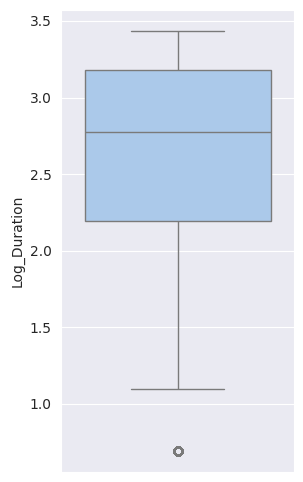

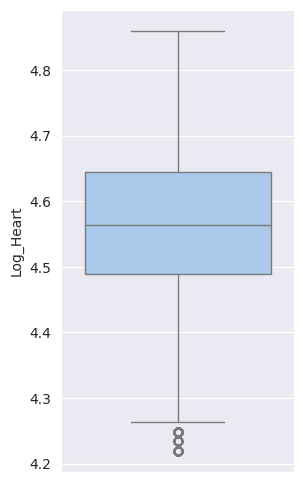

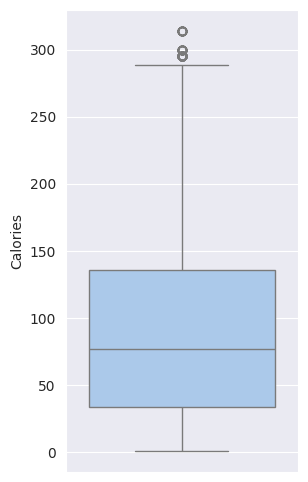

In [16]:
for column in numeric_columns:
  plt.figure(figsize=(3, 6))
  sns.boxplot(df[column])
  plt.show()

## Визуализация корреляционной матрицы

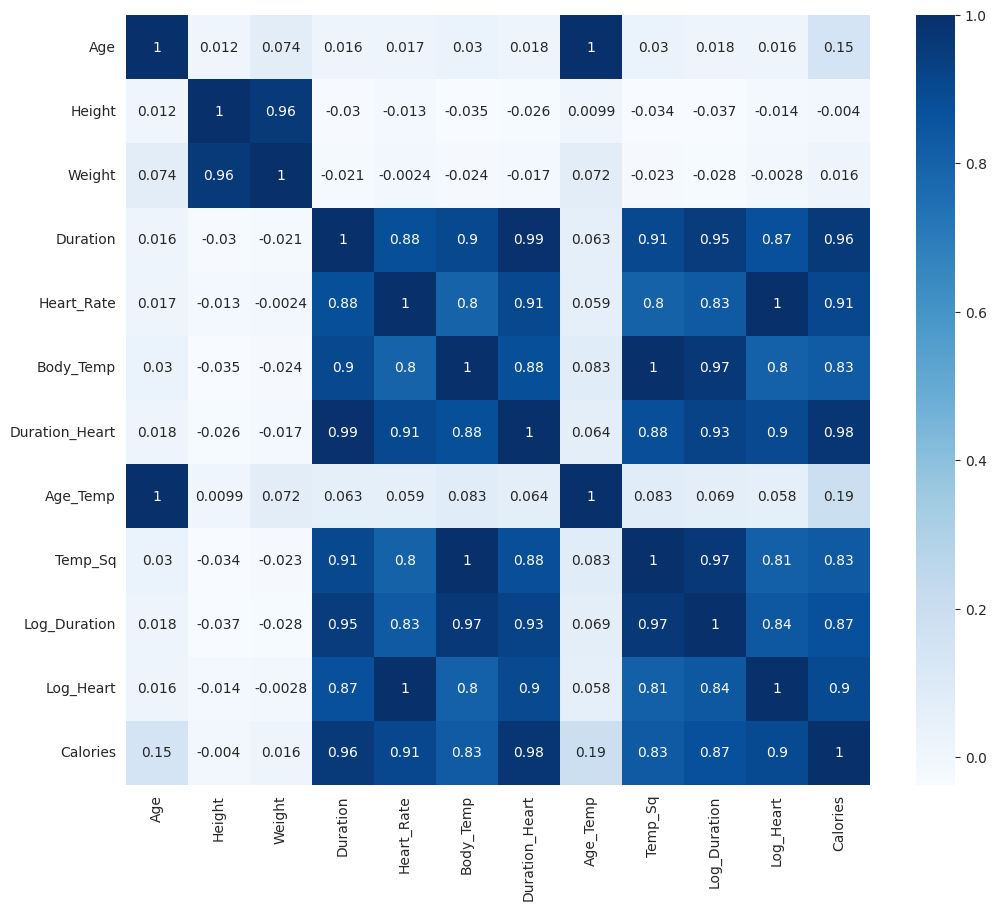

In [17]:
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

Исходя из матрицы корреляций, наибольшую взаимозависимость с целевой переменной имеют признаки:

*Базовые*
<br>
Duration - 0.96
<br>
Heart_Rate - 0.91
<br>
Body_Temp - 0.83
<br>

*Синтетические*
<br>
Duration_Heart - 0.98
<br>
Log_Heart - 0.9
<br>
Log_Duration - 0.87

## Визуализация распределения целевой переменной в зависимости от пола

<Axes: xlabel='Calories', ylabel='Count'>

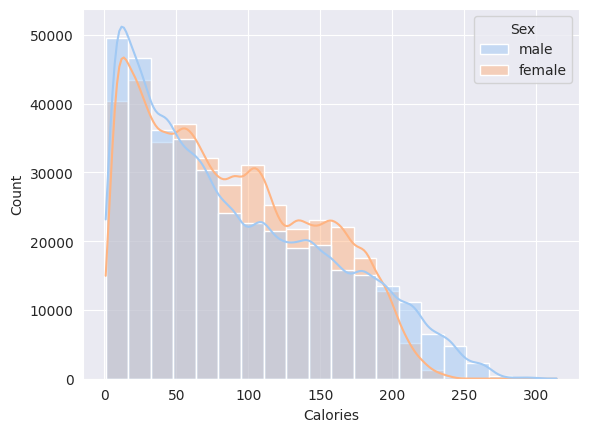

In [18]:
sns.histplot(data=df, x='Calories', hue='Sex', kde=True, bins=20)

In [22]:
df

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
id                                                                     
0         male   36   189.0    82.0      26.0       101.0       41.0   
1       female   64   163.0    60.0       8.0        85.0       39.7   
2       female   51   161.0    64.0       7.0        84.0       39.8   
3         male   20   192.0    90.0      25.0       105.0       40.7   
4       female   38   166.0    61.0      25.0       102.0       40.6   
...        ...  ...     ...     ...       ...         ...        ...   
749995    male   28   193.0    97.0      30.0       114.0       40.9   
749996  female   64   165.0    63.0      18.0        92.0       40.5   
749997    male   60   162.0    67.0      29.0       113.0       40.9   
749998    male   45   182.0    91.0      17.0       102.0       40.3   
749999  female   39   171.0    65.0      19.0        97.0       40.6   

        Duration_Heart  Age_Temp  Temp_Sq  Log_Duration  Log_Heart  Calories  
id                                                                            
0               2626.0    1476.0  1681.00      3.295837   4.624973     150.0  
1                680.0    2540.8  1576.09      2.197225   4.454347      34.0  
2                588.0    2029.8  1584.04      2.079442   4.442651      29.0  
3               2625.0     814.0  1656.49      3.258097   4.663439     140.0  
4               2550.0    1542.8  1648.36      3.258097   4.634729     146.0  
...                ...       ...      ...           ...        ...       ...  
749995          3420.0    1145.2  1672.81      3.433987   4.744932     230.0  
749996          1656.0    2592.0  1640.25      2.944439   4.532599      96.0  
749997          3277.0    2454.0  1672.81      3.401197   4.736198     221.0  
749998          1734.0    1813.5  1624.09      2.890372   4.634729     109.0  
749999          1843.0    1583.4  1648.36      2.995732   4.584967     103.0  

[750000 rows x 13 columns]

## Кодирование категориальных признаков

In [23]:
sex_dic = {'female': 0, 'male': 1}
df['Sex'] = df['Sex'].map(sex_dic)

In [24]:
df

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
id                                                                  
0         1   36   189.0    82.0      26.0       101.0       41.0   
1         0   64   163.0    60.0       8.0        85.0       39.7   
2         0   51   161.0    64.0       7.0        84.0       39.8   
3         1   20   192.0    90.0      25.0       105.0       40.7   
4         0   38   166.0    61.0      25.0       102.0       40.6   
...     ...  ...     ...     ...       ...         ...        ...   
749995    1   28   193.0    97.0      30.0       114.0       40.9   
749996    0   64   165.0    63.0      18.0        92.0       40.5   
749997    1   60   162.0    67.0      29.0       113.0       40.9   
749998    1   45   182.0    91.0      17.0       102.0       40.3   
749999    0   39   171.0    65.0      19.0        97.0       40.6   

        Duration_Heart  Age_Temp  Temp_Sq  Log_Duration  Log_Heart  Calories  
id                                                                            
0               2626.0    1476.0  1681.00      3.295837   4.624973     150.0  
1                680.0    2540.8  1576.09      2.197225   4.454347      34.0  
2                588.0    2029.8  1584.04      2.079442   4.442651      29.0  
3               2625.0     814.0  1656.49      3.258097   4.663439     140.0  
4               2550.0    1542.8  1648.36      3.258097   4.634729     146.0  
...                ...       ...      ...           ...        ...       ...  
749995          3420.0    1145.2  1672.81      3.433987   4.744932     230.0  
749996          1656.0    2592.0  1640.25      2.944439   4.532599      96.0  
749997          3277.0    2454.0  1672.81      3.401197   4.736198     221.0  
749998          1734.0    1813.5  1624.09      2.890372   4.634729     109.0  
749999          1843.0    1583.4  1648.36      2.995732   4.584967     103.0  

[750000 rows x 13 columns]

## Разделение датасета на тренировочную и валидационную выборку

In [25]:
X = df.drop(columns=['Calories'])
y = df['Calories']

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
df

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
id                                                                  
0         1   36   189.0    82.0      26.0       101.0       41.0   
1         0   64   163.0    60.0       8.0        85.0       39.7   
2         0   51   161.0    64.0       7.0        84.0       39.8   
3         1   20   192.0    90.0      25.0       105.0       40.7   
4         0   38   166.0    61.0      25.0       102.0       40.6   
...     ...  ...     ...     ...       ...         ...        ...   
749995    1   28   193.0    97.0      30.0       114.0       40.9   
749996    0   64   165.0    63.0      18.0        92.0       40.5   
749997    1   60   162.0    67.0      29.0       113.0       40.9   
749998    1   45   182.0    91.0      17.0       102.0       40.3   
749999    0   39   171.0    65.0      19.0        97.0       40.6   

        Duration_Heart  Age_Temp  Temp_Sq  Log_Duration  Log_Heart  Calories  
id                                                                            
0               2626.0    1476.0  1681.00      3.295837   4.624973     150.0  
1                680.0    2540.8  1576.09      2.197225   4.454347      34.0  
2                588.0    2029.8  1584.04      2.079442   4.442651      29.0  
3               2625.0     814.0  1656.49      3.258097   4.663439     140.0  
4               2550.0    1542.8  1648.36      3.258097   4.634729     146.0  
...                ...       ...      ...           ...        ...       ...  
749995          3420.0    1145.2  1672.81      3.433987   4.744932     230.0  
749996          1656.0    2592.0  1640.25      2.944439   4.532599      96.0  
749997          3277.0    2454.0  1672.81      3.401197   4.736198     221.0  
749998          1734.0    1813.5  1624.09      2.890372   4.634729     109.0  
749999          1843.0    1583.4  1648.36      2.995732   4.584967     103.0  

[750000 rows x 13 columns]

## Модель XGBRegressor

In [30]:
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error

Подбор гипперпараметров

In [ ]:
model = xgb.XGBRegressor(
    objective='reg:squarederror', random_state=42
)

In [ ]:
grid_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10]
}

In [ ]:
grid_clf = GridSearchCV(model, grid_params, cv=5, verbose=3)

In [ ]:
grid_clf.fit(X_train, y_train)

В ходе обучения, были подобраны следующие гипперпараметры

In [ ]:
grid_clf.best_params_

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 150}

Инициализация модели

In [31]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=150, learning_rate=0.05, max_depth=10, random_state=42)

K-Fold кросс-валидация вручную

In [32]:
from sklearn.model_selection import KFold

In [33]:
rmsle_scores = []

In [34]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
    rmsle_scores.append(rmsle)

    print(f'Fold {fold + 1}: RMSLE = {rmsle:.5f}')

print(f'Среднее RMSLE по {kf.get_n_splits()} фолдам: {np.mean(rmsle_scores):.5f}')

Fold 1: RMSLE = 0.06073
Fold 2: RMSLE = 0.06099
Fold 3: RMSLE = 0.06054
Fold 4: RMSLE = 0.06142
Fold 5: RMSLE = 0.06099
Среднее RMSLE по 5 фолдам: 0.06093


## Модель CatBoost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model_catboost = CatBoostRegressor()

In [ ]:
grid_params_2 = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10]
}

In [ ]:
grid_clf_2 = GridSearchCV(model_catboost, grid_params_2, cv=5, verbose=1)

In [ ]:
grid_clf_2.fit(X_train, y_train)

In [ ]:
grid_clf_2.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}

In [ ]:
model_2 = grid_clf_2.best_estimator_

In [ ]:
y_pred = model_2.predict(X_val)

In [ ]:
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
print('RMSLE: ', rmsle)

RMSLE:  0.06391053269728583


## Модель LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
light_gbm_model = lgb.LGBMRegressor(
    objective='regression', metrics='rmse', random_state=42
)

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'num_leaves': [15, 20, 30],
    'max_depth': [-1],
}

In [ ]:
grid_clf_2 = GridSearchCV(light_gbm_model, param_grid, cv=5, verbose=3)

In [ ]:
grid_clf_2.fit(X_train, y_train)

In [ ]:
grid_clf_2.best_params_

{'learning_rate': 0.05,
 'max_depth': -1,
 'n_estimators': 1000,
 'num_leaves': 30}

In [ ]:
model_2 = grid_clf_2.best_estimator_

In [ ]:
y_pred = model_2.predict(X_val)

In [ ]:
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
print('RMSLE: ', rmsle)

RMSLE:  0.06321712272275305


## Kaggle submission

In [35]:
df_test = pd.read_csv('test (1).csv', index_col='id')
df_test

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
id                                                                  
750000    male   45   177.0    81.0       7.0        87.0       39.8
750001    male   26   200.0    97.0      20.0       101.0       40.5
750002  female   29   188.0    85.0      16.0       102.0       40.4
750003  female   39   172.0    73.0      20.0       107.0       40.6
750004  female   30   173.0    67.0      16.0        94.0       40.5
...        ...  ...     ...     ...       ...         ...        ...
999995  female   56   159.0    62.0       6.0        85.0       39.4
999996    male   32   202.0   101.0       3.0        84.0       38.4
999997  female   31   164.0    64.0      14.0        98.0       40.1
999998  female   62   158.0    61.0      25.0       106.0       40.7
999999    male   31   199.0    96.0      15.0        98.0       39.9

[250000 rows x 7 columns]

In [36]:
df_test['Sex'] = df_test['Sex'].map(sex_dic)
df_test

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
id                                                               
750000    1   45   177.0    81.0       7.0        87.0       39.8
750001    1   26   200.0    97.0      20.0       101.0       40.5
750002    0   29   188.0    85.0      16.0       102.0       40.4
750003    0   39   172.0    73.0      20.0       107.0       40.6
750004    0   30   173.0    67.0      16.0        94.0       40.5
...     ...  ...     ...     ...       ...         ...        ...
999995    0   56   159.0    62.0       6.0        85.0       39.4
999996    1   32   202.0   101.0       3.0        84.0       38.4
999997    0   31   164.0    64.0      14.0        98.0       40.1
999998    0   62   158.0    61.0      25.0       106.0       40.7
999999    1   31   199.0    96.0      15.0        98.0       39.9

[250000 rows x 7 columns]

## Feature Engineering для тестового датасета

In [37]:
df_test['Duration_Heart'] = df_test['Duration'] * df_test['Heart_Rate']
df_test['Age_Temp'] = df_test['Age'] * df_test['Body_Temp']
df_test['Temp_Sq'] = df_test['Body_Temp'] ** 2
df_test['Log_Duration'] = np.log1p(df_test['Duration'])
df_test['Log_Heart'] = np.log1p(df_test['Heart_Rate'])

In [38]:
predictions = model.predict(df_test)

In [39]:
submission_df = pd.DataFrame(data=predictions, index=df_test.index, columns=['Calories'])

In [40]:
submission_df.to_csv('submission_4.csv')

## Сохранение модели XGBRegressor

In [43]:
model.save_model("xgb_model.json")